In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import multiprocessing as multi

In [16]:
dpi = 120

In [4]:
%%capture PC_name 
!hostname

In [5]:
#setting dots per inch for images
dpi = 90

#setting number of processors for multiprocessing
PC_name_str = PC_name.stdout[0:-2]

if (PC_name_str == 'science12'or PC_name_str == 'science11' or 
        PC_name_str == 'science10'):
    cores = 42        
    
else:
    cores = multi.cpu_count()

print(PC_name_str)
print(cores)

science10
42


In [6]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 
                                     'vz[km/s]' ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


(array([3249., 1331.,  626.,  154.,  677.,   36.,    5.]), array([3.e+13, 5.e+13, 7.e+13, 9.e+13, 1.e+14, 3.e+14, 5.e+14, 7.e+14]), <BarContainer object of 7 artists>)


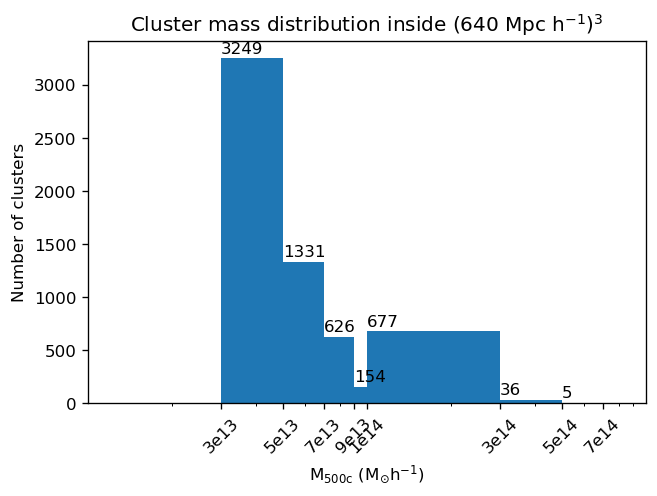

In [42]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [8]:
np.geomspace(3e13, 7e14, num = 8)

array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14])

(array([2933., 1803.,  833.,  330.,  130.,   39.,   10.]), array([3.00000000e+13, 4.70485789e+13, 7.37856258e+13, 1.15716961e+14,
       1.81477286e+14, 2.84608279e+14, 4.46347169e+14, 7.00000000e+14]), <BarContainer object of 7 artists>)


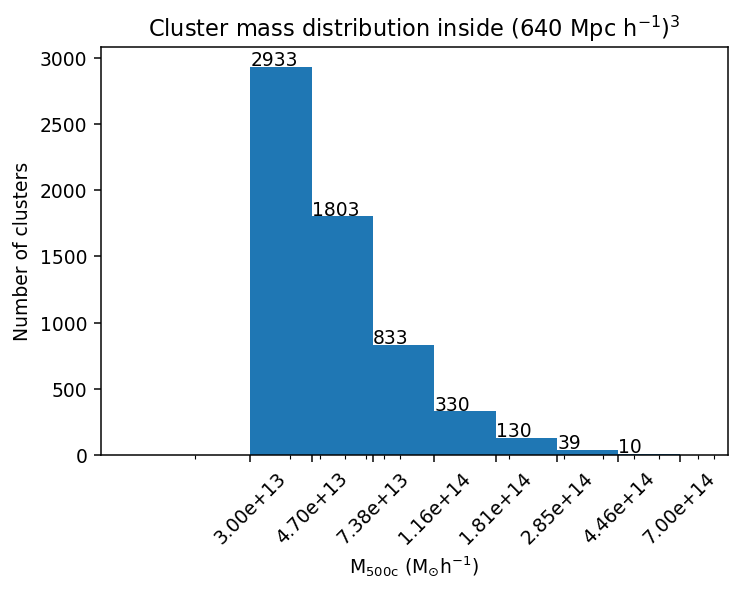

In [15]:
plt.figure(dpi = dpi*1.5)

bins = np.geomspace(3e13, 7e14, num = 8)
hist_data = plt.hist(df_clusters_orig['m500c[Msol/h]'],  bins = bins)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (640 Mpc h$^{-1}$)$^3$');

bins_str = ['{:.2e}'.format(i) for i in bins]
plt.xticks(hist_data[1], bins_str, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
print(hist_data)
for i in range(len(hist_data[0])):
    plt.text(hist_data[1][i],hist_data[0][i]+10,str(int(hist_data[0][i])));

In [10]:
df_clusters_temp = df_clusters_orig.copy()

df_clusters_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_clusters_temp['x[kpc/h]'] = df_clusters_orig['x[kpc/h]'] + (640000 * i)
            df_clusters_temp['y[kpc/h]'] = df_clusters_orig['y[kpc/h]'] + (640000 * j)
            df_clusters_temp['z[kpc/h]'] = df_clusters_orig['z[kpc/h]'] + (640000 * k)

            df_clusters_big = df_clusters_big.append(df_clusters_temp)

df_clusters_big.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,1.641600e+05,1.641600e+05,1.641600e+05,1.641600e+05,164160.000000,164160.000000,164160.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,5.546773e+05,5.535561e+05,5.538918e+05,4.851314e+13,316.039508,306.202286,286.431703
min,1.916329e+01,1.526539e+02,8.737095e+01,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,4.863366e+05,4.736062e+05,4.789278e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.440918e+06,1.444771e+06,1.441655e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.919888e+06,1.919933e+06,1.919848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


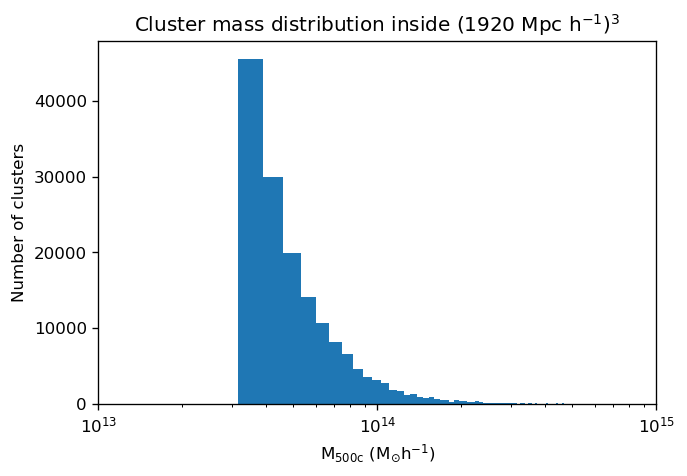

In [43]:
plt.figure(dpi = dpi)
plt.hist(df_clusters_big['m500c[Msol/h]'],  bins = 100)
plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of clusters')
plt.title('Cluster mass distribution inside (1920 Mpc h$^{-1}$)$^3$');

In [12]:
low_bound = 640000
upp_bound = 640000 * 2  #128000

df_clusters_center = df_clusters_big[(df_clusters_big['x[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['x[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['y[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['y[kpc/h]'] < upp_bound) & 
                                     (df_clusters_big['z[kpc/h]'] > low_bound) & 
                                     (df_clusters_big['z[kpc/h]'] < upp_bound)]

df_clusters_center.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6.080000e+03,6.080000e+03,6.080000e+03,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,9.664164e+05,9.620554e+05,9.613082e+05,6.356245e+13,2.109102,-1.647297,-4.296055
std,1.860216e+05,1.826509e+05,1.836659e+05,4.851698e+13,316.064539,306.226537,286.454388
min,6.400192e+05,6.401527e+05,6.400874e+05,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,8.009786e+05,8.047934e+05,8.018639e+05,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,9.788846e+05,9.732743e+05,9.621101e+05,4.801630e+13,-3.619450,1.969450,-8.055475
75%,1.126228e+06,1.113557e+06,1.118894e+06,6.945502e+13,206.816750,207.755750,181.532000
max,1.279888e+06,1.279933e+06,1.279848e+06,7.438200e+14,1197.640000,1164.960000,1201.260000


In [13]:
%%time
df_gal_orig = pd.read_csv(data_address + 'massive_galaxies_10_10.csv')      #massive_galaxies.csv contains galaxies with mass greater than 1.8 ×10^{11} h^{−1} M_sun as done by Tanimura et al. (2020)
df_gal_orig.describe()

CPU times: user 3.93 s, sys: 8.49 ms, total: 3.94 s
Wall time: 3.94 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06,3.678431e+06
mean,3.231623e+05,3.213125e+05,3.203307e+05,4.091361e+10,-3.848629e-01,2.138708e-01,7.666311e-02
std,1.850387e+05,1.834972e+05,1.836340e+05,8.963719e+10,3.562749e+02,3.498227e+02,3.336928e+02
min,2.472523e-02,4.139575e-02,1.757775e-01,1.000010e+10,-3.890077e+03,-3.448558e+03,-3.414454e+03
25%,1.614168e+05,1.635298e+05,1.616021e+05,1.731070e+10,-2.255566e+02,-2.198906e+02,-2.071114e+02
50%,3.277754e+05,3.255006e+05,3.202183e+05,2.291080e+10,-5.377200e+00,2.296509e+00,-5.732940e-01
75%,4.823795e+05,4.765793e+05,4.785357e+05,3.694520e+10,2.205335e+02,2.203445e+02,2.064592e+02
max,6.399998e+05,6.399998e+05,6.399998e+05,1.077460e+13,3.089348e+03,3.447494e+03,3.245993e+03


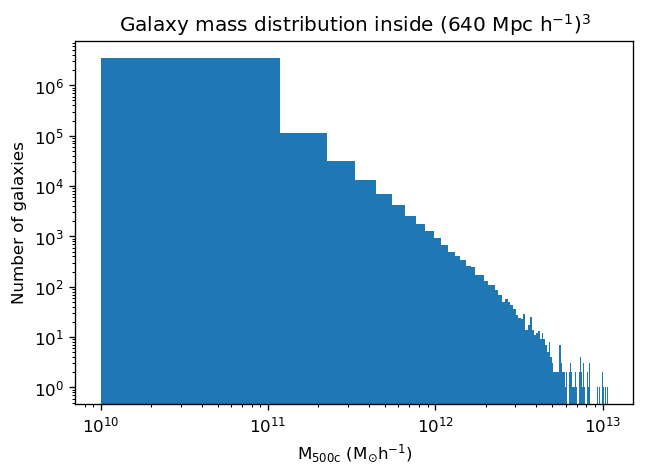

In [17]:
plt.figure(dpi = dpi)

bins = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
hist_data = plt.hist(df_gal_orig['m[Msol/h]'], bins = 100)
# hist_data = plt.hist(df_gal_orig['m[Msol/h]'],  bins = bins)
# plt.xlim(1e13, 1e15)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M$\mathrm{_{500c}}$ (M$\mathrm{_{\odot} h^{-1}}$)')
plt.ylabel('Number of galaxies')
plt.title('Galaxy mass distribution inside (640 Mpc h$^{-1}$)$^3$');

# bins = ['3e13', '5e13', '7e13', '9e13', '1e14', '3e14', '5e14', '7e14']
# plt.xticks(hist_data[1], bins, rotation = 45)
# plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylim(0,200)
# print(hist_data)
# for i in range(len(hist_data[0])):
#     plt.text(hist_data[1][i],hist_data[0][i]+50,str(int(hist_data[0][i])));

In [18]:
%%time
df_gal_temp = df_gal_orig.copy()

df_gal_big = pd.DataFrame()

for k in range(3):
    for i in range(3):
        for j in range(0,3):

            df_gal_temp['x[kpc/h]'] = df_gal_orig['x[kpc/h]'] + (640000 * i)
            df_gal_temp['y[kpc/h]'] = df_gal_orig['y[kpc/h]'] + (640000 * j)
            df_gal_temp['z[kpc/h]'] = df_gal_orig['z[kpc/h]'] + (640000 * k)

            df_gal_big = df_gal_big.append(df_gal_temp)

df_gal_big.describe()

CPU times: user 47.1 s, sys: 24.2 s, total: 1min 11s
Wall time: 1min 9s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07,9.931764e+07
mean,9.631623e+05,9.613125e+05,9.603307e+05,4.091361e+10,-3.848629e-01,2.138708e-01,7.666311e-02
std,5.543518e+05,5.538392e+05,5.538846e+05,8.963717e+10,3.562749e+02,3.498227e+02,3.336928e+02
min,2.472523e-02,4.139575e-02,1.757775e-01,1.000010e+10,-3.890077e+03,-3.448558e+03,-3.414454e+03
25%,4.823797e+05,4.765794e+05,4.785357e+05,1.731070e+10,-2.255567e+02,-2.198907e+02,-2.071115e+02
50%,9.677754e+05,9.655006e+05,9.602183e+05,2.291080e+10,-5.377200e+00,2.296509e+00,-5.732940e-01
75%,1.441417e+06,1.443530e+06,1.441602e+06,3.694520e+10,2.205335e+02,2.203446e+02,2.064593e+02
max,1.920000e+06,1.920000e+06,1.920000e+06,1.077460e+13,3.089348e+03,3.447494e+03,3.245993e+03


In [46]:
def no_of_gals_bins(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):
    
    gal_no = np.zeros((n_clusters, radi.shape[0]-1))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', 
                           df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        
        df_gal_cube.insert(4, 'y_shift[kpc/h]', 
                           df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        
        df_gal_cube.insert(5, 'z_shift[kpc/h]', 
                           df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', 
                           np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                   df_gal_cube['y_shift[kpc/h]']**2 +
                                   df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi[:-1]):

            df_gal_sphere = df_gal_cube[(df_gal_cube['dist_from_clus'] >= radi[i]) & 
                                        (df_gal_cube['dist_from_clus'] < radi[i+1])]
            
            gal_no[j,i] = len(df_gal_sphere)
            
#             if len(df_gal_sphere) == 0:
#                 gal_no[j, i] = 0
            
#             else:
#                 gal_no[j, i] = len(df_gal_sphere)

    
    return gal_no.mean(axis = 0), gal_no.std(axis = 0), low_lim, upper_lim

    

CPU times: user 236 ms, sys: 18.5 ms, total: 255 ms
Wall time: 255 ms


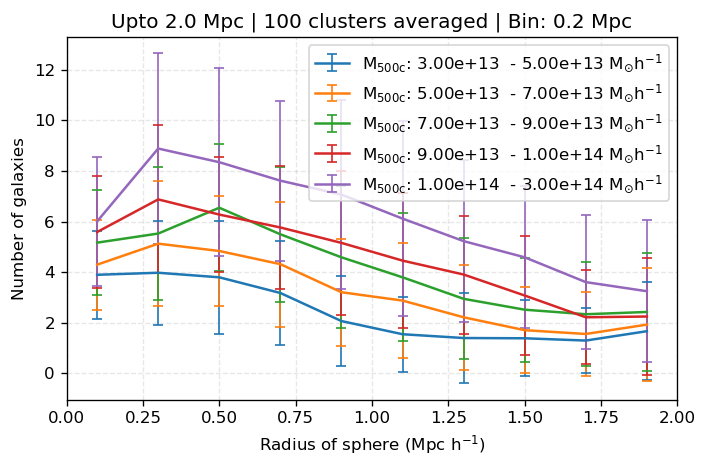

In [54]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(0, max_extent + 1, 200)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):

    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

# pool = multi.Pool(processes = cores)
# results = pool.starmap(no_of_gals_bins, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, gal_no_std, low_lim, upper_lim = result
    
#     plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
#              label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
#                      " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

    plt.errorbar(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
                 yerr = gal_no_std, capsize = 3, elinewidth = 1,
                 label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')



    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | ' +
          f'Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 239 ms, sys: 481 ms, total: 720 ms
Wall time: 3min 6s


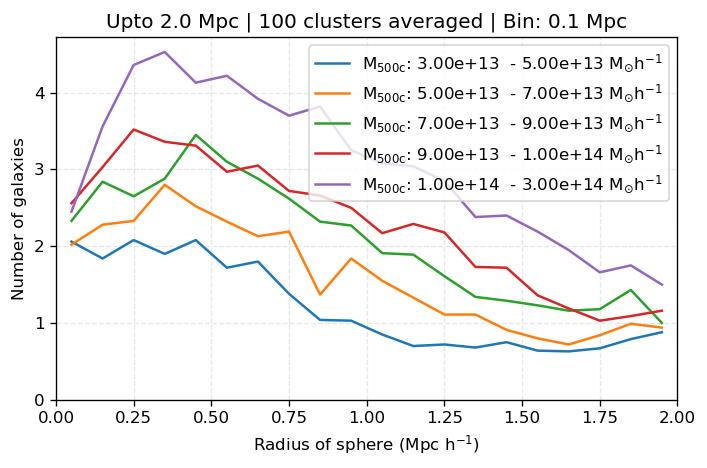

In [29]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(0, max_extent + 1, 100)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):

    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals_bins, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, gal_no_std, low_lim, upper_lim = result
    
#     plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
#              label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
#                      " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

    plt.errorbar(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
                 yerr = gal_no_std, 
                 label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')



    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | ' +
           'Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 274 ms, sys: 436 ms, total: 709 ms
Wall time: 3min 22s


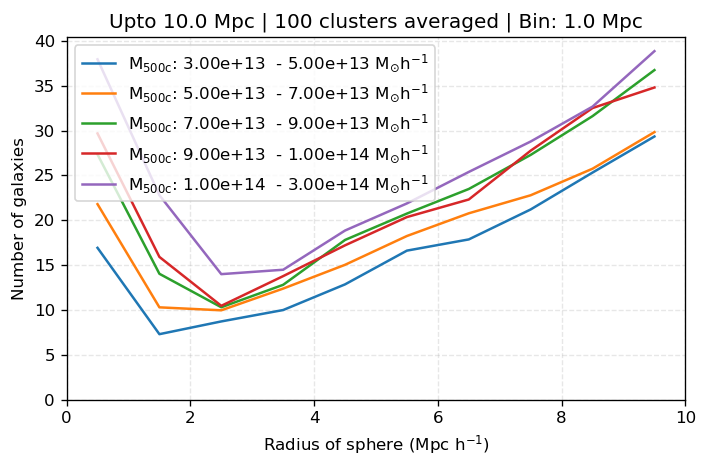

In [30]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(0, max_extent + 1, 1000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    
#     no_of_gals_bins(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
#                                     df_clusters_center[
#                                     (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                                     (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                                     radi, max_extent)
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals_bins, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')

    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | ' + 
           'Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 809 ms, sys: 765 ms, total: 1.57 s
Wall time: 41min 19s


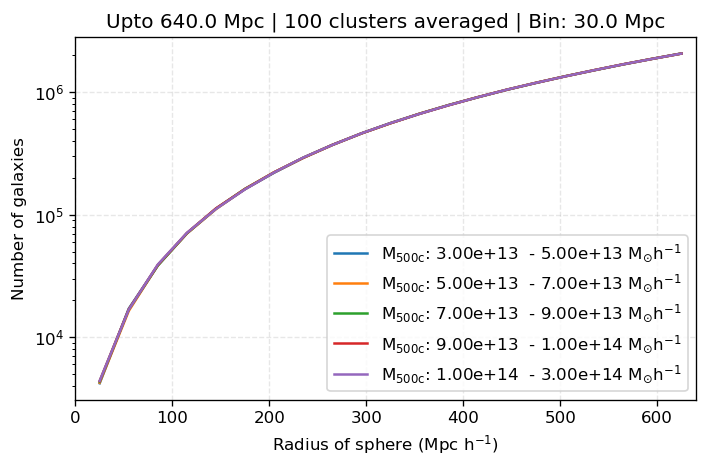

In [32]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals_bins, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | ' + 
           'Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [27]:
def no_of_gals(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):
    
        
    v_disp = np.zeros((n_clusters, radi.shape[0]))
    gal_no = np.zeros((n_clusters, radi.shape[0]))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, 
                                               random_state = 0)    
    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', 
                           df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', 
                           df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', 
                           df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', 
                           np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                                   df_gal_cube['y_shift[kpc/h]']**2 +
                                   df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi):

            df_gal_sphere = df_gal_cube[df_gal_cube['dist_from_clus'] <= r]
            
            gal_no[j,i] = len(df_gal_sphere)
            
    
    return gal_no.mean(axis = 0), low_lim, upper_lim

    
   

CPU times: user 304 ms, sys: 486 ms, total: 790 ms
Wall time: 3min 18s


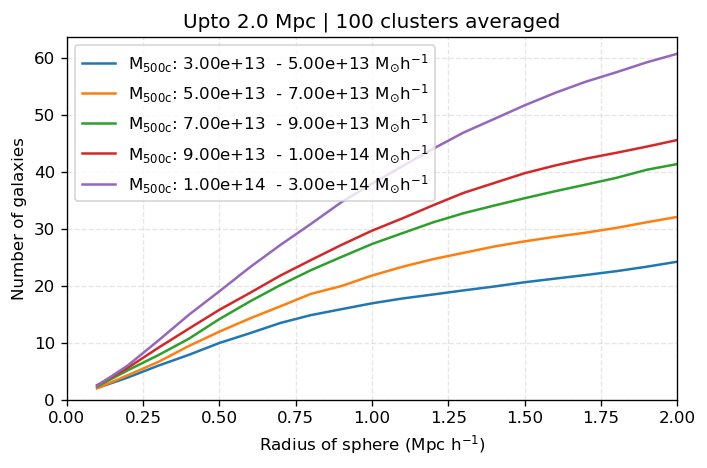

In [31]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    

    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0,)
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 345 ms, sys: 668 ms, total: 1.01 s
Wall time: 4min 19s


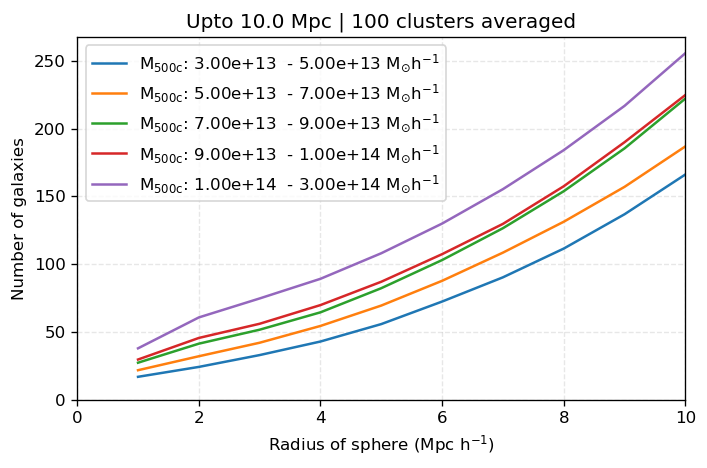

In [34]:
%%time

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 10000
radi = np.arange(1000, max_extent + 1, 1000)

n_clusters = 100
# n_clusters = 2

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
    
    
  
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
    
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
plt.ylim(0, )
plt.xlim(0, max_extent/1e3)

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 694 ms, sys: 621 ms, total: 1.31 s
Wall time: 53min 8s


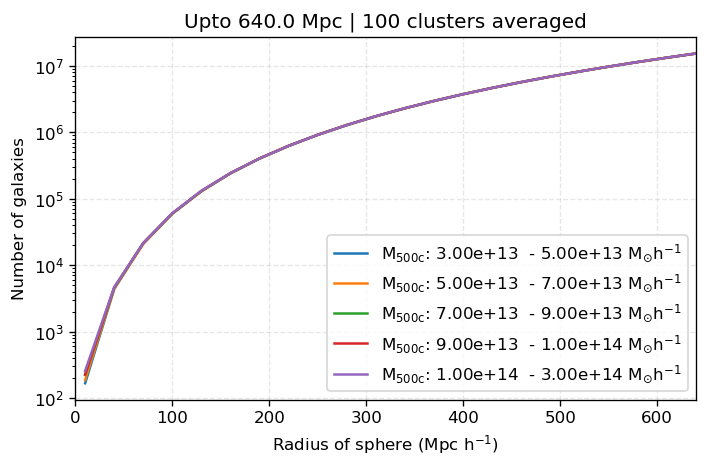

In [35]:
%%time


mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

n_clusters = 100
# n_clusters = 2

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
            
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(no_of_gals, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    gal_no_mean, low_lim, upper_lim = result
    
    plt.plot(radi/1e3, gal_no_mean, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('Number of galaxies')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

In [38]:
def mass_profile(gray_shade, low_lim, upper_lim, df_clusters_inner, radi, max_extent):

    v_bulk_x = np.zeros(radi.shape)
    v_bulk_y = np.zeros(radi.shape)
    v_bulk_z = np.zeros(radi.shape)
        
    v_bulk_mag = np.zeros((n_clusters, radi.shape[0]))
    avg_mass = np.zeros((n_clusters, radi.shape[0]-1))
    
    random_clusters = df_clusters_inner.sample(n = n_clusters, replace = False, random_state = 0)    
    random_clusters = random_clusters.reset_index(drop = True)
    
    for j, random_cluster in random_clusters.iterrows():
        
        df_gal_cube = df_gal_big[
                            (df_gal_big['x[kpc/h]'] > (random_cluster['x[kpc/h]'] - max_extent)) & 
                            (df_gal_big['x[kpc/h]'] < (random_cluster['x[kpc/h]'] + max_extent)) & 
                            (df_gal_big['y[kpc/h]'] > (random_cluster['y[kpc/h]'] - max_extent)) & 
                            (df_gal_big['y[kpc/h]'] < (random_cluster['y[kpc/h]'] + max_extent)) & 
                            (df_gal_big['z[kpc/h]'] > (random_cluster['z[kpc/h]'] - max_extent)) & 
                            (df_gal_big['z[kpc/h]'] < (random_cluster['z[kpc/h]'] + max_extent))
                                            ]

        df_gal_cube.insert(3, 'x_shift[kpc/h]', 
                           df_gal_cube['x[kpc/h]'] - random_cluster['x[kpc/h]'])
        df_gal_cube.insert(4, 'y_shift[kpc/h]', 
                           df_gal_cube['y[kpc/h]'] - random_cluster['y[kpc/h]'])
        df_gal_cube.insert(5, 'z_shift[kpc/h]', 
                           df_gal_cube['z[kpc/h]'] - random_cluster['z[kpc/h]'])


        df_gal_cube.insert(6, 'dist_from_clus', 
                           np.sqrt(df_gal_cube['x_shift[kpc/h]']**2 + 
                           df_gal_cube['y_shift[kpc/h]']**2 +
                           df_gal_cube['z_shift[kpc/h]']**2))
  

        for i, r in enumerate(radi[:-1]):

            df_gal_sphere = df_gal_cube[(df_gal_cube['dist_from_clus'] > radi[i]) & 
                                        (df_gal_cube['dist_from_clus'] < radi[i+1])]
            
            if len(df_gal_sphere) == 0:
                avg_mass[j, i] = 0
            
            else:
                avg_mass[j, i] = np.mean(df_gal_sphere['m[Msol/h]'])
            
#             print(df_gal_sphere['m[Msol/h]'].mean())
    
    

#     print(avg_mass.mean(axis = 0))
    
    return avg_mass.mean(axis = 0), low_lim, upper_lim
    

CPU times: user 615 ms, sys: 517 ms, total: 1.13 s
Wall time: 4min 40s


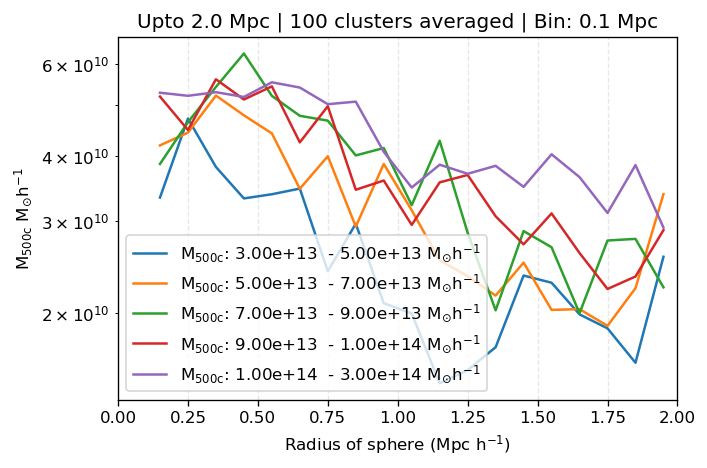

In [39]:
%%time


mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 2000
radi = np.arange(100, max_extent + 1, 100)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):
      
#     mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
#                 df_clusters_center[
#                 (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                 (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                 radi, max_extent)
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(mass_profile, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    avg_mass, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, avg_mass, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 468 ms, sys: 623 ms, total: 1.09 s
Wall time: 4min 25s


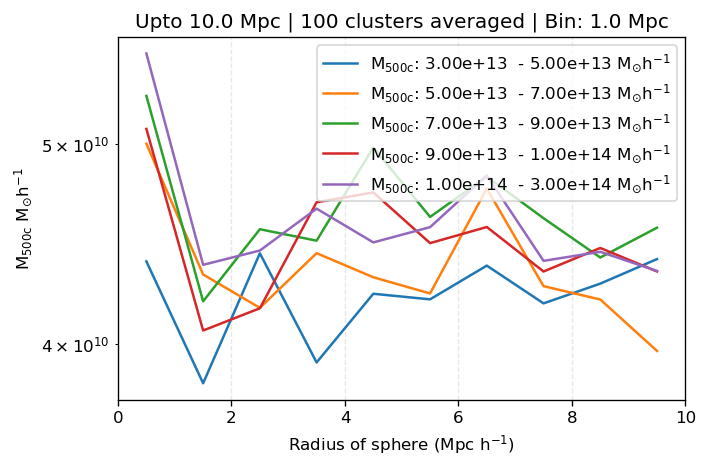

In [41]:
%%time


mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 10000
radi = np.arange(0, max_extent + 1, 1000)

param_list = []

for i, mass in enumerate(mass_ranges[:-1]):

    
#     mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
#                 df_clusters_center[
#                 (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
#                 (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
#                 radi, max_extent)
    
    df_clusters_center_bin = df_clusters_center[
                    (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                    (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])]
    
    param_list.append([gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                    df_clusters_center_bin,
                    radi, max_extent])
    

pool = multi.Pool(processes = cores)
results = pool.starmap(mass_profile, param_list)

plt.figure(dpi = dpi)
plt.grid(ls = 'dashed', alpha = 0.3)

for result in results:
    avg_mass, low_lim, upper_lim = result
    
    plt.plot(radi[1:]/1e3 - (radi[1]-radi[0])/2e3, avg_mass, 
#              c = gray_shade,
             label = "M$_{500\mathrm{c}}$:" + " {:.2e} ".format(low_lim) + 
                     " - {:.2e} ".format(upper_lim) + 'M$_{\odot}$h$^{-1}$')
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')

CPU times: user 1h 20min 8s, sys: 4min 9s, total: 1h 24min 18s
Wall time: 1min 43s


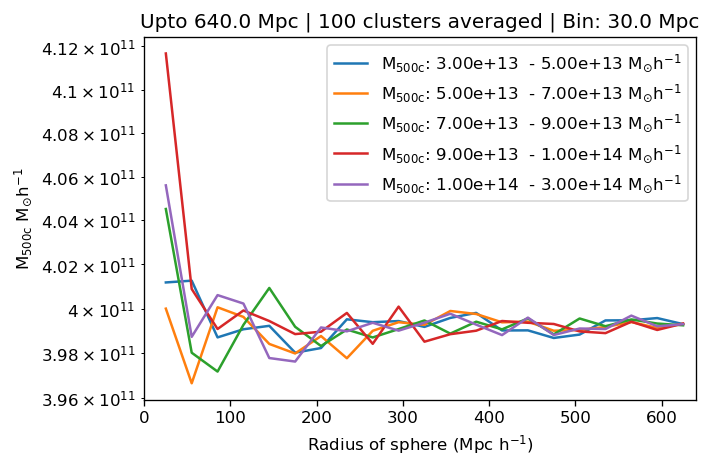

In [20]:
%%time

plt.figure(dpi = dpi)
# plt.grid(ls = 'dashed', alpha = 0.3)

mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14, 5e14, 7e14]
mass_ranges = [3e13, 5e13, 7e13, 9e13, 1e14, 3e14]
# mass_ranges = [5e14, 7e14]
# mass_ranges = np.geomspace(3e13, 7e14, num = 8)

gray_shades = ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
gray_shades = gray_shades[::-1]

n_clusters = 100
# n_clusters = 2

max_extent = 640000
radi = np.arange(10000, max_extent + 1, 30000)

for i, mass in enumerate(mass_ranges[:-1]):
    
    
    mass_profile(gray_shades[i], mass_ranges[i], mass_ranges[i+1],
                df_clusters_center[
                (df_clusters_center['m500c[Msol/h]'] > mass_ranges[i]) & 
                (df_clusters_center['m500c[Msol/h]'] < mass_ranges[i+1])],
                radi, max_extent)
    
#     break
    
plt.xlabel('Radius of sphere (Mpc h$^{-1}$)')
plt.ylabel('M$_{500\mathrm{c}}$ M$_{\odot}$h$^{-1}$')
plt.legend()
# plt.ylim(0,)
plt.xlim(0, max_extent/1e3)
plt.yscale('log')

plt.title(f'Upto {max_extent/1e3} Mpc | {n_clusters} clusters averaged | '+ 
           'Bin: {(radi[1]-radi[0])/1e3} Mpc');
plt.tight_layout()
# plt.savefig(f'Plots/bulk_vel_{n_clusters}_clusters_averaged.pdf')